In [198]:
import matplotlib.pyplot as plt
from utils import load_analysis_ready_text
import numpy as np
import numpy.linalg as la

%matplotlib inline

FILE1 = '../data/005.txt'
FILE2 = '../data/017.txt'

In [199]:
txt1 = load_analysis_ready_text(FILE1)
txt2 = load_analysis_ready_text(FILE2)

In [200]:
print(len(txt1), len(txt2))

5410 6709


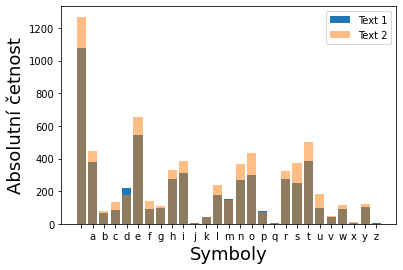

In [201]:
from collections import Counter

cc1 = Counter(txt1)
cc2 = Counter(txt2)

cc1 = sorted(cc1.items())
cc2 = sorted(cc2.items())

char1, cnts1 = zip(*cc1)
char2, cnts2 = zip(*cc2)

ttl1 = sum(cnts1)
ttl2 = sum(cnts2)

fig, ax1 = plt.subplots()

ax1.bar(char1, cnts1, label='Text 1')
ax1.bar(char2, cnts2, alpha = 0.5, label='Text 2')
ax1.legend()
ax1.set_xticks(char1)
ax1.set_ylabel('Absolutní četnost', size=18)
ax1.set_xlabel('Symboly', size=18)
fig.savefig('img/abschdistr.png',dpi=300)

In [202]:
ch_to_id = {' ': 0}
alphabet = list(char1[1:])
for ch in alphabet:
    ch_to_id[ch] = ord(ch) - ord('a')+1

id_to_ch = {i:ch for i,ch in zip(range(len(char1)),char1)}

In [203]:

window_width = 2
pp = np.zeros(shape = (27,27))

for start in range(len(txt1)-1):
    ngram = txt1[start:start+window_width]
    pp[ch_to_id[ngram[0]]][ch_to_id[ngram[1]]] +=1

def relative_freq(row):
    return row/sum(row)

pp = np.apply_along_axis(relative_freq, 1, pp)



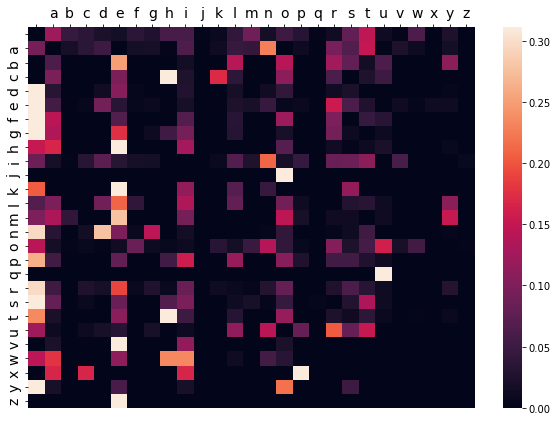

In [204]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(data=pp, robust=True)
ax.xaxis.tick_top()
ax.set_xticklabels(char1, size=14)
ax.set_yticklabels(char1, size=14)
fig.savefig('img/heatmapp.png',dpi=300)

In [205]:
w, v = la.eig(pp.T)

In [206]:
piT = v[:,np.argwhere(np.isclose(w,1)==True)[0]]
pi1T = piT / sum(piT)

print(la.norm(piT.T @ pp - piT.T))
print(la.norm(pi1T.T @ pp - pi1T.T))


6.240479341634231e-16
1.7458274374552003e-16


In [207]:
pis = [0]*27
pis[0] = 0.5
pis[1] = 0.5
stationary = np.array(pis)@la.matrix_power(pp,1000)
print(stationary)
print(la.norm(stationary @ pp - stationary))
print(la.norm(stationary - pi1T.T.real))

[0.19951441 0.06988035 0.01182626 0.01516204 0.04030086 0.10017683
 0.01682323 0.01793284 0.05086534 0.05805666 0.00055472 0.0081344
 0.03272568 0.02773664 0.04991405 0.0550737  0.01404755 0.00074035
 0.05046304 0.04603571 0.07083622 0.01811623 0.00813418 0.01663981
 0.00110897 0.01864535 0.0005546 ]
1.475795510944672e-16
1.990738394474378e-15


In [223]:
la.matrix_power(pp,1000)

array([[0.19951441, 0.06988035, 0.01182626, 0.01516204, 0.04030086,
        0.10017683, 0.01682323, 0.01793284, 0.05086534, 0.05805666,
        0.00055472, 0.0081344 , 0.03272568, 0.02773664, 0.04991405,
        0.0550737 , 0.01404755, 0.00074035, 0.05046304, 0.04603571,
        0.07083622, 0.01811623, 0.00813418, 0.01663981, 0.00110897,
        0.01864535, 0.0005546 ],
       [0.19951441, 0.06988035, 0.01182626, 0.01516204, 0.04030086,
        0.10017683, 0.01682323, 0.01793284, 0.05086534, 0.05805666,
        0.00055472, 0.0081344 , 0.03272568, 0.02773664, 0.04991405,
        0.0550737 , 0.01404755, 0.00074035, 0.05046304, 0.04603571,
        0.07083622, 0.01811623, 0.00813418, 0.01663981, 0.00110897,
        0.01864535, 0.0005546 ],
       [0.19951441, 0.06988035, 0.01182626, 0.01516204, 0.04030086,
        0.10017683, 0.01682323, 0.01793284, 0.05086534, 0.05805666,
        0.00055472, 0.0081344 , 0.03272568, 0.02773664, 0.04991405,
        0.0550737 , 0.01404755, 0.00074035, 0.0504

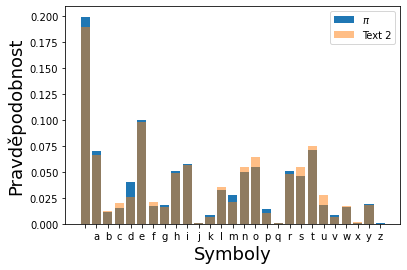

In [224]:
from collections import Counter

cc1 = Counter(txt1)
cc2 = Counter(txt2)

cc1 = sorted(cc1.items())
cc2 = sorted(cc2.items())

char1, cnts1 = zip(*cc1)
char2, cnts2 = zip(*cc2)

ttl2 = sum(cnts2)

fig, ax1 = plt.subplots()

ax1.bar(char1, stationary, label='$\pi$')
ax1.bar(char2, [cnt/ttl2 for cnt in cnts2], alpha = 0.5, label='Text 2')
ax1.legend()
ax1.set_xticks(char1)
ax1.set_ylabel('Pravděpodobnost', size=18)
ax1.set_xlabel('Symboly', size=18)
fig.savefig('img/pit2distr.png',dpi=300)

In [228]:
from scipy.stats import chisquare

alpha = .05

n2 = sum(cnts2)

exp = [n2 * pi_i for pi_i in stationary]

chisq, p = chisquare(cnts2, exp)

print(chisq)
print(p)
print(chi2.ppf(1-alpha, df=len(cnts2)-1))
chi2.ppf(1-p, df=len(cnts2)-1)


145.27311137497207
1.530836096050011e-18
38.885138659830055


inf

In [227]:
for ch, Ni, npi in zip(char2, cnts2, exp):
    print(ch, Ni, npi, ((Ni-npi)**2)/npi)

  1269 1338.5421621880591 3.612969735585266
a 447 468.8272845924104 1.0162172047906233
b 81 79.34235787456225 0.034631910238537636
c 135 101.72210093547676 10.886705602463344
d 175 270.37846121612836 33.64561963641301
e 657 672.0863679338347 0.3386447163550305
f 142 112.86704232142395 7.519725915069903
g 109 120.31141256241978 1.0634739583901578
h 330 341.2555398167117 0.3712384468062434
i 382 389.5021506188611 0.14449795416701483
j 6 3.7216186159074884 1.394829042715737
k 44 54.573669866717765 2.048652669380386
l 240 219.55657045356935 1.9035358894360948
m 143 186.08513365315665 9.975696099240121
n 369 334.8733780847795 3.4778110162270344
o 431 369.4894667448073 10.239928446867797
p 72 94.24499845822078 5.25056994537073
q 5 4.9669958430406504 0.00021930245384110475
r 321 338.55651053443023 0.910427218365997
s 370 308.8535523290239 12.105698751349813
t 504 475.24019113476317 1.7404390903681128
u 183 121.54179303989015 31.076645393177987
v 45 54.57224196069346 1.679018725674804
w 113 11